## Problem Statement :
#### Use classification technique for prediction of Graduate Admissions from an Indian perspective

### Import Required Libraries

In [1]:
# importing required libraries
import pandas as pd        # for dataframe manupulation
import numpy as np         # perform mathematical operations

import seaborn as sns       # for visualising
import matplotlib.pyplot as plt



#### Reading the required Data

In [2]:
df=pd.read_csv("D:\downloads\Admission_Predict_Ver1.1.csv")

### Exploring the Data

In [3]:
df.head()      # prints the first five rows

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.tail()     # prints last five rows 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [5]:
df.shape    # no of (rows,columns)

(500, 9)

In [8]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
df.info()  # short summary about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


## EDA

### Check for duplicate values

In [11]:
df.duplicated().sum()    # To check whether there are any duplicate columns present

0

### Check For Null values

In [14]:
df.isnull().sum()        # check wheather any null values present 

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Known the unique values present

In [11]:
df['University Rating'].unique() # TO find unique values in University Rating 


array([4, 3, 2, 5, 1], dtype=int64)

In [12]:
df['Research'].unique()   

array([1, 0], dtype=int64)

In [13]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Detecting outliers

In [15]:
def detect_outliers(column):          # Function find outliers present in data
    Q1 = column.quantile(0.25)        # using IQR method
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    
    return outliers


In [16]:
for col in df.columns:
    outliers = detect_outliers(df[col])

In [30]:
if len(outliers) > 0:
        print(f"Outliers in {col}:")
        print(outliers)
        print()

Outliers in Chance of Admit :
92     0.34
376    0.34
Name: Chance of Admit , dtype: float64



<Axes: >

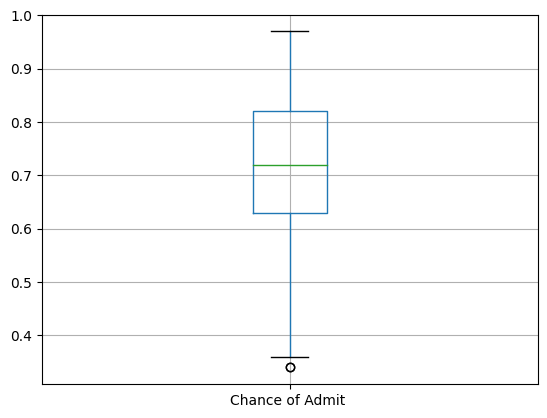

In [18]:
df.boxplot(column =['Chance of Admit '])

### Outlier Treatment

In [23]:
df1 = df.copy()    # makes a copy of the data

In [24]:
# Calculating Quartiles
Q1 = df.quantile(0.25)         
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Serial No.           249.5000
GRE Score             17.0000
TOEFL Score            9.0000
University Rating      2.0000
SOP                    1.5000
LOR                    1.0000
CGPA                   0.9125
Research               1.0000
Chance of Admit        0.1900
dtype: float64


In [25]:
df_out1 = df1[((df1 <(Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]   # detect outliers
df_out1.head()        

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
92,93,298,98,2,4.0,3.0,8.03,0,0.34
347,348,299,94,1,1.0,1.0,7.34,0,0.42
376,377,297,96,2,2.5,2.0,7.43,0,0.34


In [31]:
df_out = df1[~((df1 <(Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)] 
df = df_out.copy()
print(df.shape)     # check whether the rows are dropped

(497, 9)


### Feature Selection

In [32]:
df = df.drop(['Serial No.'], axis = 1)     # droping the columns which are not required

In [33]:
print(df.shape)

(497, 8)


### Statistical Information of the data

In [40]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000
mean,316.583501,107.259557,3.122736,3.379276,3.492958,8.582334,0.563380,0.723883
std,11.237070,6.036101,1.140806,0.987070,0.918806,0.601367,0.496466,0.138800
min,290.000000,92.000000,1.000000,1.000000,1.500000,6.800000,0.000000,0.360000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.130000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000,0.720000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.820000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### Visualising

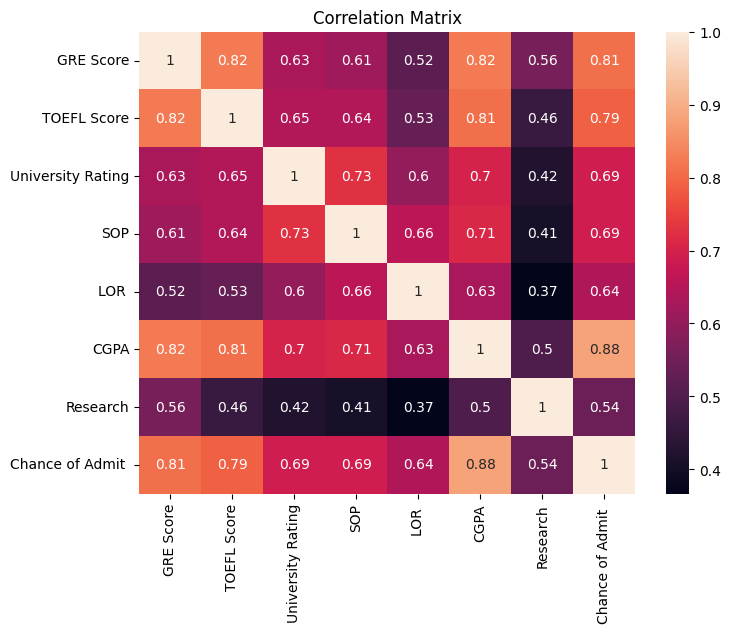

In [39]:
plt.figure(figsize=(8, 6))
# Creating a heatmap to visualize the correlation between variables in the dataset
sns.heatmap(df.corr(), annot=True)
# Annotating the heatmap with correlation values
plt.title("Correlation Matrix")
plt.show()

WE can observe that our target variable i.e Chance of Addmit is highly correalated with GRE Score, TOEFL Score, and Most with CGPA

In [43]:
g = sns.pairplot(data=df,hue='Research',markers=["^", "v"],palette='Paired')

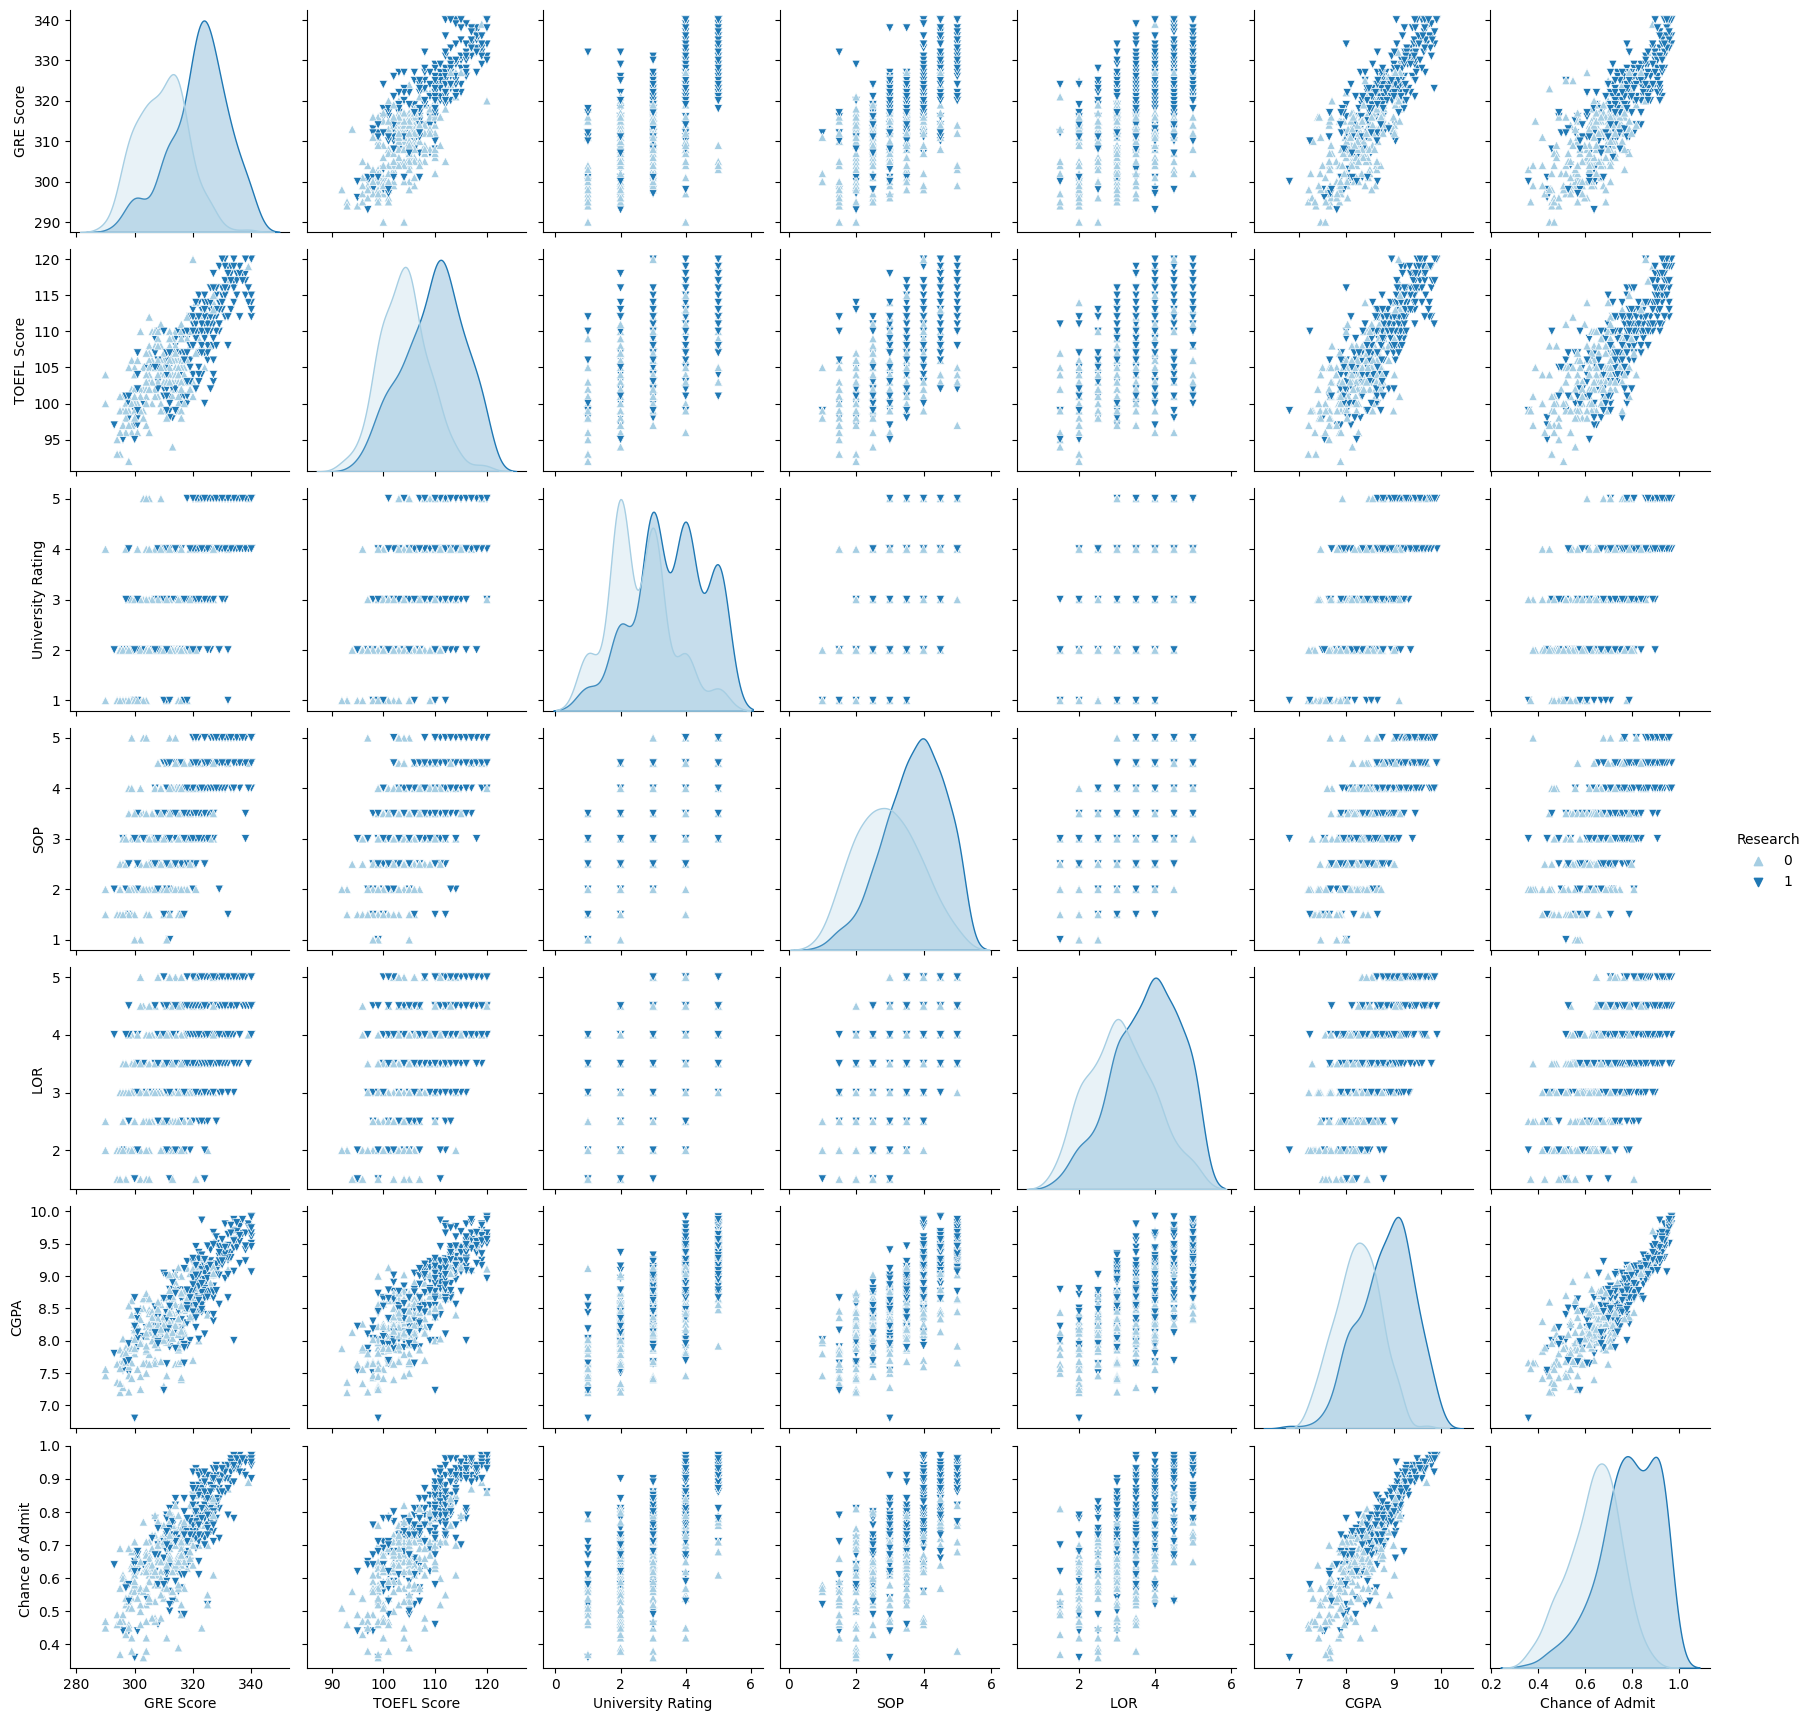

In [44]:
plt.show(g)

Can observe that GRE Score,TOEFL,CGPA and Chance of Admit has Positive correlation

### Check for the average values

In order to classify the target variable

In [46]:
print("Average GRE Score :{0:.2f} out of 340".format(df['GRE Score'].mean()))
print('Average TOEFL Score:{0:.2f} out of 120'.format(df['TOEFL Score'].mean()))
print('Average CGPA:{0:.2f} out of 10'.format(df['CGPA'].mean()))
print('Average Chance of getting admitted:{0:.2f}%'.format(df['Chance of Admit '].mean()*100))

Average GRE Score :316.58 out of 340
Average TOEFL Score:107.26 out of 120
Average CGPA:8.58 out of 10
Average Chance of getting admitted:72.39%


In [47]:
# importing Standard Scaler
from sklearn.preprocessing import StandardScaler  

# Create a StandardScaler object
scaler = StandardScaler()

# Apply StandardScaler to the dataframe
scaled_features = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_features, columns=df.columns)

In [48]:
scaled_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.818719,1.781161,0.769761,1.136549,1.097138,1.777188,0.880341,1.414372
1,0.660668,-0.043044,0.769761,0.629489,1.097138,0.478836,0.880341,0.260470
2,-0.051979,-0.540555,-0.107696,-0.384631,0.007672,-0.969326,0.880341,-0.028006
3,0.482506,0.454466,-0.107696,0.122429,-1.081793,0.145925,0.880341,0.548945
4,-0.230140,-0.706391,-0.985153,-1.398751,-0.537061,-0.619770,-1.135924,-0.532838


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier                
from sklearn.metrics import accuracy_score, classification_report

In [51]:
# Splitting the Data
X = scaled_df.drop('Chance of Admit ', axis=1)
y = scaled_df['Chance of Admit ']

In [52]:
# Convert continuous target variable to discrete classes
y_class = (y > 0.8).astype(int)     # it converts the chance of admit greater than 80% are set to (1) and Rest to (0)

In [53]:
# Train Test data split
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.3, random_state=42)

In [54]:
# Model Training
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


Accuracy: 0.9466666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       120
           1       0.87      0.87      0.87        30

    accuracy                           0.95       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.95      0.95      0.95       150



In [59]:
import pickle

In [60]:
pickle.dump(model,open('Admissionprediction.pkl','wb'))

In [63]:
input_data = pd.DataFrame({
    'GRE Score': [300],
    'TOEFL Score': [100],
    'University Rating': [4],
    'SOP': [4.5],
    'LOR ': [4.5],
    'CGPA': [8.0],
    'Research': [1]
})
chance_of_admit = model.predict(input_data)
print("Chance of Admit:", chance_of_admit)

Chance of Admit: [1]
